# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Andrewi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)
print(f"api_key Key type: {type(api_key)}")

api_key Key type: <class 'str'>


In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(q="bitcoin",
                                          language="en",
                                          sort_by="relevancy")
bitcoin_news

{'status': 'ok',
 'totalResults': 9413,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'New York passes a bill to limit bitcoin mining',
   'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
   'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
   'publishedAt': '2022-06-03T16:11:26Z',
   'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"},
  {'source': {'id': 

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(q="ethereum",
                                          language="en",
                                          sort_by="relevancy")
ethereum_news

{'status': 'ok',
 'totalResults': 4560,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Barr',
   'title': 'GameStop Dunks Its Head Into the Crypto Kiddie Pool',
   'description': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though it’s hard to say whether its proposed population of gamers and game developers will take up the company on its belated, head-first jump into the crypto sph…',
   'url': 'https://gizmodo.com/gamestop-crypto-nft-wallet-blockchain-1848965386',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/cd4c128b4182d7b2fba8152d7bb35733.jpg',
   'publishedAt': '2022-05-23T21:35:00Z',
   'content': 'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# vader_sentiment 12-NLP/wk2/05-vader_sentiment

bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.5574,0.098,0.902,0.000,New York lawmakers have passed a bill\r\n that...
1,0.4404,0.000,0.923,0.077,"Rapper and entrepreneur Shawn Carter, better k..."
2,0.5267,0.000,0.876,0.124,A new study on bitcoin calls into question whe...
3,0.5106,0.000,0.836,0.164,"Image caption, President Faustin-Archange Toua..."
4,-0.1027,0.040,0.960,0.000,You can now reportedly pay for your burritos a...


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...
1,0.1280,0.000,0.954,0.046,GameStop is going all-in on crypto. The video ...
2,0.3182,0.000,0.941,0.059,The ability to conduct external transfers on P...
3,0.5859,0.000,0.866,0.134,"A decentralized autonomous organization, or DA..."
4,0.3612,0.044,0.875,0.081,"Crypto Winter It May Be, But Ethereum Looks Li..."


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.016715,0.057650,0.876800,0.065600
std,0.398865,0.068859,0.092058,0.061384
min,-0.859300,0.000000,0.646000,0.000000
25%,-0.317450,0.000000,0.835250,0.000000
50%,0.051350,0.049000,0.881000,0.065500
75%,0.334100,0.083250,0.932750,0.116500
max,0.526700,0.300000,1.000000,0.187000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.00000
mean,-0.037305,0.051150,0.906900,0.04200
std,0.405662,0.085919,0.084171,0.04527
min,-0.948500,0.000000,0.628000,0.00000
25%,-0.381800,0.000000,0.877250,0.00000
50%,0.000000,0.020000,0.925000,0.03800
75%,0.328950,0.077500,0.955750,0.07650
max,0.585900,0.372000,1.000000,0.13400


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin 0.054550

Q: Which coin had the highest compound score?

A: Ethereum 0.585900

Q. Which coin had the highest positive score?

A: Bitcoin 0.187000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {}
sw = sw.union(sw_addon)

In [12]:
# Complete the tokenizer function
#ngram_count 12nlp/wk1/07-Ngrams
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    #tokens = ' '.join(tokens)
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.5574,0.098,0.902,0.000,New York lawmakers have passed a bill\r\n that...,"[new, york, lawmaker, passed, bill, would, tem..."
1,0.4404,0.000,0.923,0.077,"Rapper and entrepreneur Shawn Carter, better k...","[rapper, entrepreneur, shawn, carter, better, ..."
2,0.5267,0.000,0.876,0.124,A new study on bitcoin calls into question whe...,"[new, study, bitcoin, call, question, whether,..."
3,0.5106,0.000,0.836,0.164,"Image caption, President Faustin-Archange Toua...","[image, caption, president, faustinarchange, t..."
4,-0.1027,0.040,0.960,0.000,You can now reportedly pay for your burritos a...,"[reportedly, pay, burrito, taco, bitcoin, digi..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.1027,0.040,0.960,0.000,GameStop has officially thrown itself headlong...,"[gamestop, ha, officially, thrown, headlong, w..."
1,0.1280,0.000,0.954,0.046,GameStop is going all-in on crypto. The video ...,"[gamestop, going, allin, crypto, video, game, ..."
2,0.3182,0.000,0.941,0.059,The ability to conduct external transfers on P...,"[ability, conduct, external, transfer, paypals..."
3,0.5859,0.000,0.866,0.134,"A decentralized autonomous organization, or DA...","[decentralized, autonomous, organization, dao,..."
4,0.3612,0.044,0.875,0.081,"Crypto Winter It May Be, But Ethereum Looks Li...","[crypto, winter, may, ethereum, looks, like, b..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()),n=2)
bitcoin_ngram_counts = Counter(bitcoin_ngram)

print(dict(bitcoin_ngram_counts))

{('new', 'york'): 1, ('york', 'lawmaker'): 1, ('lawmaker', 'passed'): 1, ('passed', 'bill'): 1, ('bill', 'would'): 1, ('would', 'temporarily'): 1, ('temporarily', 'ban'): 1, ('ban', 'new'): 1, ('new', 'bitcoin'): 1, ('bitcoin', 'mining'): 2, ('mining', 'operation'): 1, ('operation', 'early'): 1, ('early', 'friday'): 1, ('friday', 'state'): 1, ('state', 'senator'): 1, ('senator', 'voted'): 1, ('voted', 'pas'): 1, ('pas', 'legislation'): 1, ('legislation', 'bound'): 1, ('bound', 'desk'): 1, ('desk', 'charsrapper'): 1, ('charsrapper', 'entrepreneur'): 1, ('entrepreneur', 'shawn'): 1, ('shawn', 'carter'): 1, ('carter', 'better'): 1, ('better', 'known'): 1, ('known', 'jayz'): 1, ('jayz', 'bringing'): 1, ('bringing', 'bitcoin'): 1, ('bitcoin', 'place'): 1, ('place', 'grew'): 1, ('grew', 'thursday'): 1, ('thursday', 'jayz'): 1, ('jayz', 'former'): 1, ('former', 'twitter'): 1, ('twitter', 'ceo'): 1, ('ceo', 'jack'): 1, ('jack', 'dorsey'): 1, ('dorsey', 'announced'): 1, ('announced', 'launch'):

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_ngram = ngrams(tokenizer(ethereum_df.text.str.cat()),n=2)
ethereum_ngram_counts = Counter(ethereum_ngram)

print(dict(ethereum_ngram_counts))

{('gamestop', 'ha'): 1, ('ha', 'officially'): 1, ('officially', 'thrown'): 1, ('thrown', 'headlong'): 1, ('headlong', 'web'): 1, ('web', 'viper'): 1, ('viper', 'nest'): 1, ('nest', 'new'): 1, ('new', 'app'): 1, ('app', 'release'): 1, ('release', 'though'): 1, ('though', 'hard'): 1, ('hard', 'say'): 1, ('say', 'whether'): 1, ('whether', 'proposed'): 1, ('proposed', 'population'): 1, ('population', 'gamers'): 1, ('gamers', 'game'): 1, ('game', 'developer'): 1, ('developer', 'take'): 1, ('take', 'charsgamestop'): 1, ('charsgamestop', 'going'): 1, ('going', 'allin'): 1, ('allin', 'crypto'): 1, ('crypto', 'video'): 1, ('video', 'game'): 1, ('game', 'retailer'): 1, ('retailer', 'launchedits'): 1, ('launchedits', 'selfcustodial'): 1, ('selfcustodial', 'ethereum'): 1, ('ethereum', 'digital'): 1, ('digital', 'wallet'): 1, ('wallet', 'said'): 1, ('said', 'monday'): 1, ('monday', 'wallet'): 1, ('wallet', 'accessible'): 1, ('accessible', 'google'): 1, ('google', 'chrome'): 1, ('chrome', 'extension

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_top_10 = token_count(tokenizer(bitcoin_df.text.str.cat()),10)
bitcoin_top_10

[('bitcoin', 15),
 ('new', 8),
 ('token', 6),
 ('blockchain', 6),
 ('digital', 4),
 ('biggest', 4),
 ('cryptocurrencies', 4),
 ('cryptocurrency', 4),
 ('reuters', 4),
 ('world', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_top_10 = token_count(tokenizer(ethereum_df.text.str.cat()), 10)
ethereum_top_10

[('cryptocurrency', 10),
 ('ha', 6),
 ('crypto', 4),
 ('ethereum', 4),
 ('charsthe', 4),
 ('market', 4),
 ('year', 4),
 ('new', 3),
 ('video', 3),
 ('digital', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

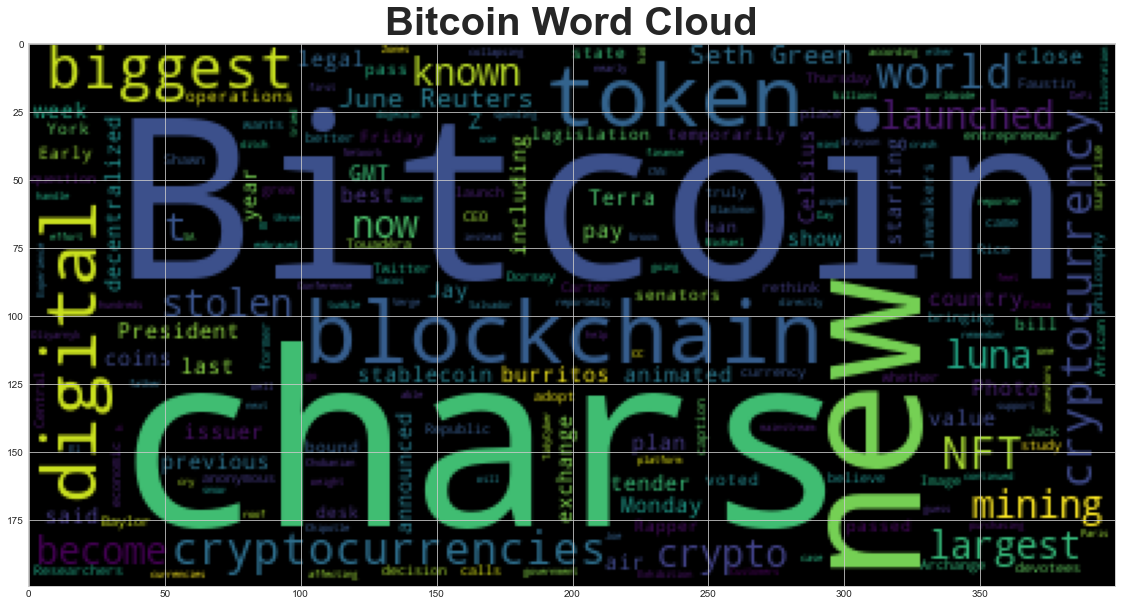

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_WC = WordCloud().generate(bitcoin_df.text.str.cat())
plt.title('Bitcoin Word Cloud', fontweight="bold", fontsize=40)
plt.imshow(bitcoin_WC)

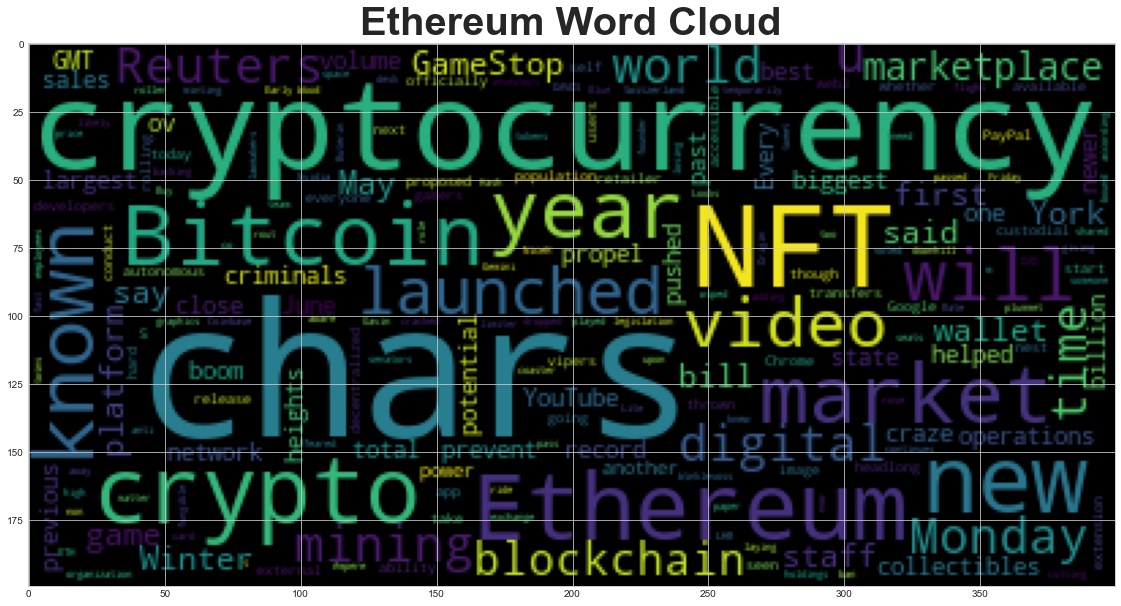

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_WC = WordCloud().generate(ethereum_df.text.str.cat())
plt.title('Ethereum Word Cloud', fontweight="bold", fontsize=40)
plt.imshow(ethereum_WC)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_string

"New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]Rapper and entrepreneur Shawn Carter, better known as Jay-Z, is bringing Bitcoin to the place where he grew up. On Thursday, Jay-Z and former Twitter CEO Jack Dorsey announced the launch of Bitcoin A… [+2920 chars]A new study on bitcoin calls into question whether the digital currency is truly as decentralized and anonymous as its biggest devotees would have you believe. \r\n Researchers from Baylor, Rice, and t… [+7343 chars]Image caption, President Faustin-Archange Touadéra wants to rethink his country's economic philosophy\r\nThe Central African Republic's decision to adopt Bitcoin as legal tender came as a surprise to m… [+8881 chars]You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending your 

In [28]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_string)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(bitcoin_doc, style='ent')

In [30]:
# List all Entities
# YOUR CODE HERE!
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)


New York GPE
Friday DATE
36-27 CARDINAL
Shawn Carter PERSON
Jay-Z PERSON
Thursday DATE
Jay-Z PERSON
Jack Dorsey PERSON
Faustin-Archange Touadéra LAW
The Central African Republic's ORG
Bitcoin NORP
first ORDINAL
Joe TidyCyber PERSON
this week DATE
billions CARDINAL
Bitcoin NORP
Salvador ORG
hundreds CARDINAL
last year DATE
nearly three feet QUANTITY
Chipotle ORG
The Paris NFT Day EVENT
The Celsius Network PRODUCT
DeFi GPE
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
GMT WORK_OF_ART
Monday DATE
3,218.95 MONEY
51.6% PERCENT
June 14 DATE
Reuters ORG
Tuesday DATE
MicroStrategy Inc ORG
24 CARDINAL
Reuters ORG
its ninth week DATE
two CARDINAL
Seth Green's PERSON
Nike ORG
today DATE
Seth Green's PERSON
NFT ORG
Seth Green's PERSON
NFT ORG
Bankman-Fried P

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_string = ethereum_df.text.str.cat()
ethereum_string

'GameStop has officially thrown itself headlong into the web3 vipers nest with a new app release, though its hard to say whether its proposed population of gamers and game developers will take up the … [+3255 chars]GameStop is going all-in on crypto. The video game retailer launched\xa0its own self-custodial Ethereum digital wallet, it said Monday. The wallet will be accessible through a Google Chrome extension an… [+1491 chars]The ability to conduct external transfers on PayPal\'s crypto platform, an image of which can be seen below, will start rolling out to users today and be available to everyone in the U.S. in the next … [+687 chars]A decentralized autonomous organization, or DAO, is giving away two seats on a Blue Origin flight to space.\r\nThis is likely the first time non-fungible tokens, or NFTs, have played a role in minting … [+4509 chars]Crypto Winter It May Be, But Ethereum Looks Like A Buy \r\nThe Winklevoss twins are cutting the staff at Gemini and say crypto winter is u

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ethereum_doc = nlp(ethereum_string)

# Add a title to the document
# YOUR CODE HERE!
ethereum_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ethereum_doc, style='ent')

In [34]:
# List all Entities
# YOUR CODE HERE!
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)


GameStop ORG
web3 LOC
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
PayPal ORG
today DATE
U.S. GPE
DAO ORG
two CARDINAL
Blue Origin ORG
first ORDINAL
Gemini ORG
Ethereum (Cryptocurrency ORG
chars]New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
Nvidia ORG
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
18% PERCENT
about 1,100 CARDINAL
6 CARDINAL
Reuters ORG
5.2% PERCENT
31,441.76 MONEY
GMT WORK_OF_ART
Monday DATE
1,552.78 MONEY
34.8% PERCENT
year DATE
13 CARDINAL
Reuters ORG
12.1% PERCENT
23,366 MONEY
GMT WORK_OF_ART
Monday DATE
3,218.95 MONEY
51.6% PERCENT
Buterin PERSON
AI ORG
Eliezer Yudkowsky PERSON
Elon Musk PERSON
YouTube ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
Kim Kardashian PERSON
Floyd Mayweather PERSON
NBA ORG
Paul Pierce PERSON
Ether PERSON
NFT ORG
+5873 chars]Solana PERSON
third ORDINAL
10% PERCENT
Wednesday DATE
the past few years DATE
NFT ORG
$29 billion MONEY
6 CARDINAL
New York

---